Load Libraries

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Dataset in python

In [84]:
columns=['sentiment','id','date','query','user','text']
df=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding='latin-1',names=columns,engine='python',on_bad_lines="skip")
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Basic Dataset Check

In [85]:
df.shape

(1600000, 6)

Look at sample Tweets

In [86]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
4,800000


In [87]:
df[['sentiment', 'text']].sample(5)

,sentiment,text
1350371,4,@chrisinfante hmmm.. you're weirdddddd.. but ...
26912,0,@thesunrises Vocï¿½ chegou a conhecer ele no f...
1507828,4,@NicRamirez WTF?!? Why? Just get a blackberry
846640,4,"@redmum And I'm sure she didn't expect to win,..."
34018,0,College aibt doin it


Map Sentiment Labels(0=0,4=1)

In [88]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df['sentiment'].value_counts()

,count
sentiment,
0,800000
1,800000


Create a Balanced Dataset

In [89]:
neg = df[df['sentiment'] == 0].sample(200000, random_state=42)
pos = df[df['sentiment'] == 1].sample(200000, random_state=42)

In [90]:
df_balanced = pd.concat([neg, pos])
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [91]:
df_balanced['sentiment'].value_counts()

,count
sentiment,
0,200000
1,200000


In [92]:
df_balanced.head()

,sentiment,id,date,query,user,text
25001,0,1558187664,Sun Apr 19 07:34:03 PDT 2009,NO_QUERY,DJ_RickyB,would like to settle down and watch the footba...
369396,0,2049868851,Fri Jun 05 17:38:44 PDT 2009,NO_QUERY,dustigarcia,reaalllly hungry. want pho. and/or fried chick...
728748,0,2263146827,Sun Jun 21 00:04:02 PDT 2009,NO_QUERY,GarageGlamorous,@fiftypavements they don't air here so I have ...
366226,0,2048799783,Fri Jun 05 15:47:41 PDT 2009,NO_QUERY,AgentSarahH,is waiting for Kristin's call.... need to go o...
1159972,1,1979390123,Sun May 31 02:50:28 PDT 2009,NO_QUERY,melojean,"Susan Boyle(Bwaakk), Google Wave, BGT, Diversi..."


Keep Only Required Columns

In [93]:
df_balanced = df_balanced[['text', 'sentiment']]
df_balanced.head()

,text,sentiment
25001,would like to settle down and watch the footba...,0
369396,reaalllly hungry. want pho. and/or fried chick...,0
728748,@fiftypavements they don't air here so I have ...,0
366226,is waiting for Kristin's call.... need to go o...,0
1159972,"Susan Boyle(Bwaakk), Google Wave, BGT, Diversi...",1


Import Required Libraries

In [94]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Define Text Cleaning Function

In [95]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()  # simple tokenizer (no NLTK punkt)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


Test Cleaning on Sample Tweets

In [96]:
sample_text = df_balanced['text'].iloc[0]
print("Original:", sample_text)
print("Cleaned:", clean_text(sample_text))


Original: would like to settle down and watch the football with a beer. Fat bloody chance of that. Too much to do. 
Cleaned: would like settle watch football beer fat bloody chance much


Apply Cleaning to Entire Dataset

In [97]:
df_balanced['clean_text'] = df_balanced['text'].apply(clean_text)
df_balanced.head()

,text,sentiment,clean_text
25001,would like to settle down and watch the footba...,0,would like settle watch football beer fat bloo...
369396,reaalllly hungry. want pho. and/or fried chick...,0,reaalllly hungry want pho andor fried chicken ...
728748,@fiftypavements they don't air here so I have ...,0,dont air watch youtube
366226,is waiting for Kristin's call.... need to go o...,0,waiting kristins call need go theyre driving n...
1159972,"Susan Boyle(Bwaakk), Google Wave, BGT, Diversi...",1,susan boylebwaakk google wave bgt diversity la...


Remove Empty Text Rows

In [98]:
df_balanced = df_balanced[df_balanced['clean_text'].str.strip() != '']

In [99]:
df_balanced.head()

,text,sentiment,clean_text
25001,would like to settle down and watch the footba...,0,would like settle watch football beer fat bloo...
369396,reaalllly hungry. want pho. and/or fried chick...,0,reaalllly hungry want pho andor fried chicken ...
728748,@fiftypavements they don't air here so I have ...,0,dont air watch youtube
366226,is waiting for Kristin's call.... need to go o...,0,waiting kristins call need go theyre driving n...
1159972,"Susan Boyle(Bwaakk), Google Wave, BGT, Diversi...",1,susan boylebwaakk google wave bgt diversity la...


Import Required Modules

In [100]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Initialize Tokenizer

In [101]:
MAX_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_balanced['clean_text'])

Convert Text to Sequences

In [102]:
sequences = tokenizer.texts_to_sequences(df_balanced['clean_text'])

Padding Sequeces

In [103]:
MAX_LEN = 50
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = df_balanced['sentiment'].values

Verify Output Shape

In [104]:
print("Input shape:", X.shape)
print("Labels shape:", y.shape)


Input shape: (397979, 50)
Labels shape: (397979,)


Vocabulary Size Check

In [105]:
word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

Vocabulary size: 159121


Import Required Layers

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Input


Create Embedding Layer(Test Model)

In [107]:
model = Sequential([
    Input(shape=(50,)),
    Embedding(
        input_dim=MAX_WORDS,
        output_dim=EMBEDDING_DIM
    )
])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 50, 128)        │     2,560,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,560,000 (9.77 MB)

 Trainable params: 2,560,000 (9.77 MB)

 Non-trainable params: 0 (0.00 B)

Import Required Layers

In [108]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

Build the LSTM Model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(50,)),

    Embedding(
        input_dim=MAX_WORDS,
        output_dim=EMBEDDING_DIM
    ),

    LSTM(128, return_sequences=False),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


Compile the model

In [110]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Model Summary

In [111]:
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 50, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691,713 (10.27 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Train--Validation Split

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_val.shape)


(318383, 50) (79596, 50)


Train the Model

In [79]:
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=256,
    validation_data=(X_val, y_val)
)


Epoch 1/2
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 444s 357ms/step - accuracy: 0.7827 - loss: 0.4719 - val_accuracy: 0.7719 - val_loss: 0.4824
Epoch 2/2
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 426s 342ms/step - accuracy: 0.8083 - loss: 0.4215 - val_accuracy: 0.7793 - val_loss: 0.4690


Plot Training Curves

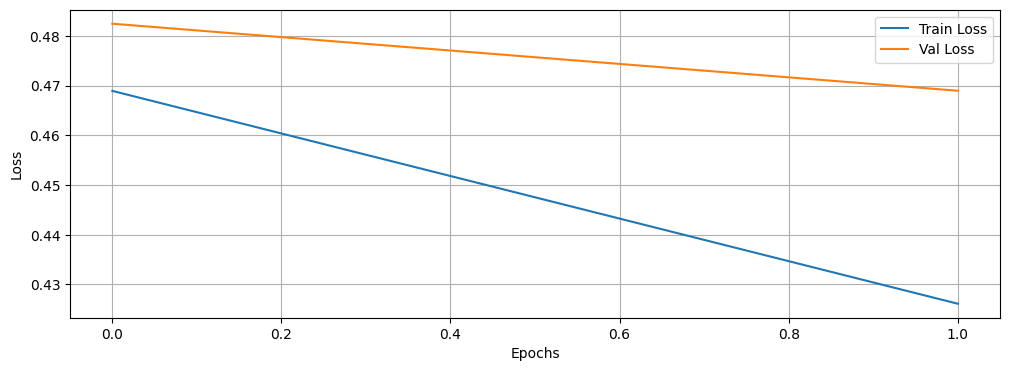

In [80]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



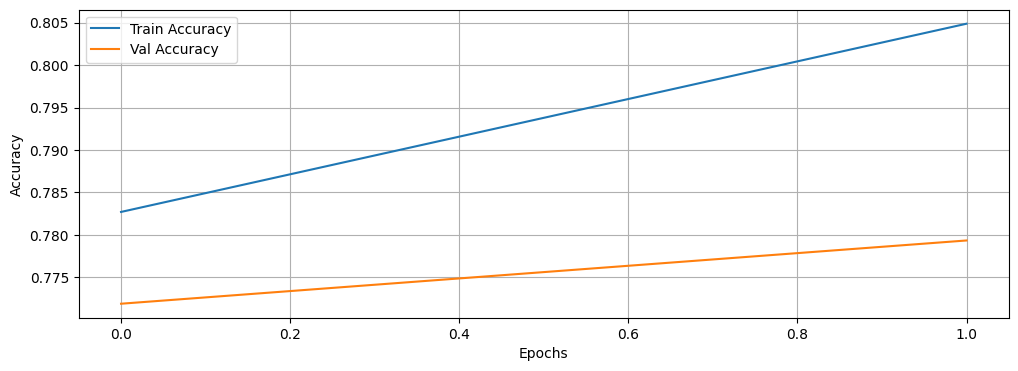

In [81]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Evalute Model

In [82]:
loss, acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", acc)


2488/2488 ━━━━━━━━━━━━━━━━━━━━ 69s 28ms/step - accuracy: 0.7776 - loss: 0.4724
Validation Accuracy: 0.7793441414833069


Import Layer

In [114]:
from tensorflow.keras.layers import Bidirectional


New Improved Model

In [115]:
model_bilstm = Sequential([
    Input(shape=(50,)),

    Embedding(
        input_dim=MAX_WORDS,
        output_dim=EMBEDDING_DIM
    ),

    Bidirectional(LSTM(128)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model_bilstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_bilstm.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 50, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,823,425 (10.77 MB)

 Trainable params: 2,823,425 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

Train Improved Model(just 2 Epochs)

In [116]:
history_bi = model_bilstm.fit(
    X_train, y_train,
    epochs=2,
    batch_size=256,
    validation_data=(X_val, y_val)
)


Epoch 1/2
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 773s 615ms/step - accuracy: 0.7310 - loss: 0.5279 - val_accuracy: 0.7819 - val_loss: 0.4585
Epoch 2/2
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 824s 633ms/step - accuracy: 0.8008 - loss: 0.4294 - val_accuracy: 0.7858 - val_loss: 0.4526


Install Required Libraries

In [117]:
pip install transformers datasets torch accelerate


Import Required Modules

In [118]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch


Load Tokenizer

In [119]:
tokenizer = DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-uncased"
)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Load Pretrained Model(Binary Classification)

In [120]:
model_bert = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


sanity Check

In [121]:
print(model_bert)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


Create Smaller Balanced Dataset

In [122]:
df_bert = df_balanced.groupby('sentiment').sample(
    n=10000,
    random_state=42
).reset_index(drop=True)

df_bert['sentiment'].value_counts()


,count
sentiment,
0,10000
1,10000


Use Raw Text(Not Cleaned)

In [123]:
texts = df_bert['text'].tolist()
labels = df_bert['sentiment'].tolist()


Tokenize Using DistilBert Tokenizer

In [124]:
encodings = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors="pt"
)


Verify Encodings

In [125]:
encodings.keys()


KeysView({'input_ids': tensor([[  101,  1008, 27907,  ...,     0,     0,     0],
        [  101,  1045,  4299,  ...,     0,     0,     0],
        [  101,  1030,  2147,  ...,     0,     0,     0],
        ...,
        [  101,  1030, 27969,  ...,     0,     0,     0],
        [  101,  2028,  2062,  ...,     0,     0,     0],
        [  101,  1030,  2402,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])})

Import Required Modules

In [127]:
from torch.utils.data import Dataset, DataLoader

Create Custom Dataset Class

In [128]:
class TwitterSentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


Train-Validation Split

In [129]:
from sklearn.model_selection import train_test_split

train_idx, val_idx = train_test_split(
    range(len(labels)),
    test_size=0.2,
    random_state=42
)

train_encodings = {k: v[train_idx] for k, v in encodings.items()}
val_encodings   = {k: v[val_idx]   for k, v in encodings.items()}

y_train = [labels[i] for i in train_idx]
y_val   = [labels[i] for i in val_idx]


Create Dataset Objects

In [130]:
train_dataset = TwitterSentimentDataset(train_encodings, y_train)
val_dataset   = TwitterSentimentDataset(val_encodings, y_val)


Create DataLoaders

In [131]:
train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=16,
    shuffle=False
)


Set Device(GPU/CPU)

In [132]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model_bert.to(device)


Using device: cpu


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


Optimizer & Learning Rate

In [134]:
from torch.optim import AdamW

optimizer = AdamW(
    model_bert.parameters(),
    lr=2e-5
)


Training Loop

In [135]:
from tqdm import tqdm

def train_epoch(model, dataloader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(dataloader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / len(dataloader), correct / total


Validation Loop

In [136]:
def eval_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return correct / total


Train for 2 Epochs

In [137]:
EPOCHS = 2

for epoch in range(EPOCHS):
    train_loss, train_acc = train_epoch(model_bert, train_loader)
    val_acc = eval_model(model_bert, val_loader)

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val Acc: {val_acc:.4f}")


100%|██████████| 1000/1000 [1:26:07<00:00,  5.17s/it]


Epoch 1/2
Train Loss: 0.4574 | Train Acc: 0.7864
Val Acc: 0.8175


100%|██████████| 1000/1000 [1:26:15<00:00,  5.18s/it]


Epoch 2/2
Train Loss: 0.3140 | Train Acc: 0.8676
Val Acc: 0.8063


Inference on New Tweets

In [141]:
def predict_sentiment(text):
    model_bert.eval()

    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=64
    )

    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model_bert(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)

    sentiment = torch.argmax(probs, dim=1).item()
    confidence = probs.max().item()

    label = "Positive" if sentiment == 1 else "Negative"
    return label, confidence


Test It

In [142]:
predict_sentiment("I absolutely love this product!")
predict_sentiment("Worst experience ever, totally disappointed.")


('Negative', 0.9868226051330566)

Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = []
y_pred = []

model_bert.eval()
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        preds = torch.argmax(outputs.logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[1514  505]
 [ 270 1711]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2019
           1       0.77      0.86      0.82      1981

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000

